In [4]:
import matplotlib.pyplot as plt
import sarracen as src
import numpy as np

# Final Setup

In [5]:
dm = 2/1000
hfact = 1.2

In [6]:
sdf = src.read_csv('../Data/results/toy_star/final.csv')
sdf.params={'mass':dm, 'hfact':hfact}
sdf.calc_density()
sdf

,x,y,z,vx,vy,vz,h,u,rho
0,-0.253181,-0.176512,0.007029,0.000485,-0.000525,0.000089,0.078685,3.634086,7.094046
1,-0.035815,-0.035973,0.054899,0.000307,0.000294,-0.000287,0.055033,3.634274,20.734653
2,-0.077768,0.163938,-0.249909,0.001089,-0.000705,-0.000791,0.078806,3.634124,7.061478
3,-0.122218,0.027058,-0.148327,0.000362,-0.000585,-0.000244,0.060290,3.634071,15.770311
4,-0.010045,-0.239781,-0.055342,-0.000582,-0.000177,0.000036,0.065810,3.634161,12.125238
...,...,...,...,...,...,...,...,...,...
995,0.066268,-0.049568,-0.028248,-0.000260,0.000277,0.000118,0.055302,3.634477,20.434362
996,0.296759,-0.077643,0.030451,-0.000275,-0.000744,0.000654,0.078542,3.634486,7.132817
997,-0.046215,-0.114757,0.286647,0.000087,-0.000162,-0.000009,0.079987,3.634265,6.753324
998,-0.185890,-0.205412,0.143083,-0.000172,-0.000180,-0.000445,0.079863,3.634181,6.784727


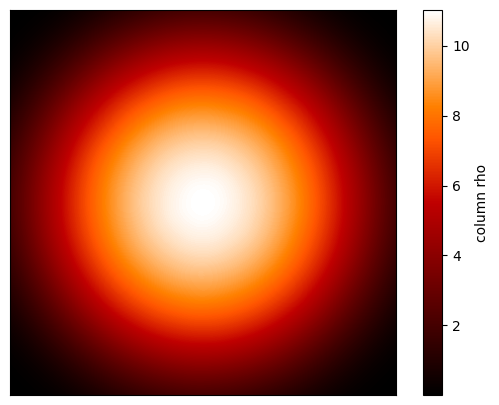

In [15]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf.render('rho', ax=ax, rotation=[0,0,0])

# Angular Momentum Conservation

In [7]:
# Angular Momentum
def angular_momentum(x, y, z, vx, vy, vz):
    lx = y*vz - z*vy
    ly = z*vx - x*vz
    lz = x*vy - y*vx
    return lx, ly, lz

In [9]:
T = 130
time = range(0, T)
ang_mom = np.zeros(T)
lin_mom = np.zeros(T)
energ = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/toy_star/' + str(ii) + ".csv")
    L = np.sum(angular_momentum(df['x'], df['y'], df['z'], df['vx'], df['vy'], df['vz']), axis=1)
    ang_mom[ii-1] = np.sqrt(L[0]*L[0] + L[1]*L[1] + L[2]*L[2])
    vx = np.sum(df['vx'])
    vy = np.sum(df['vy'])
    vz = np.sum(df['vz'])
    lin_mom[ii-1] = np.sqrt(vx*vx + vy*vy + vz*vz)
    energ[ii-1] = 0.5*lin_mom[ii-1] + np.sum(df['u'])

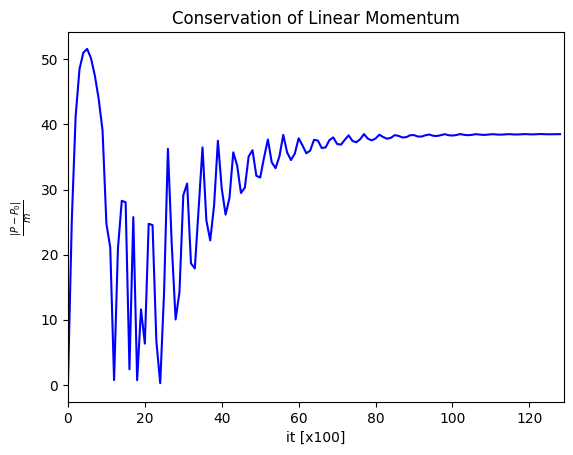

In [12]:
plt.plot(time[:], np.abs(lin_mom[:]-lin_mom[0]), '-', color='blue')
plt.title("Conservation of Linear Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\frac{|P-P_0|}{m}$")
plt.xlim(0, T)
plt.show()

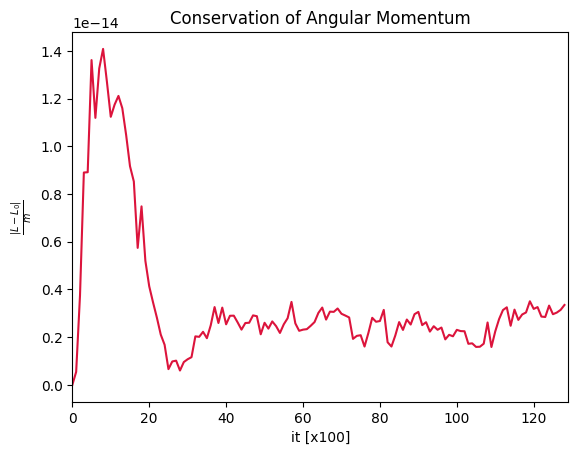

In [13]:
plt.plot(time[:], np.abs(ang_mom[:]-ang_mom[0]), '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\frac{|L-L_0|}{m}$")
plt.xlim(0, T)
plt.show()

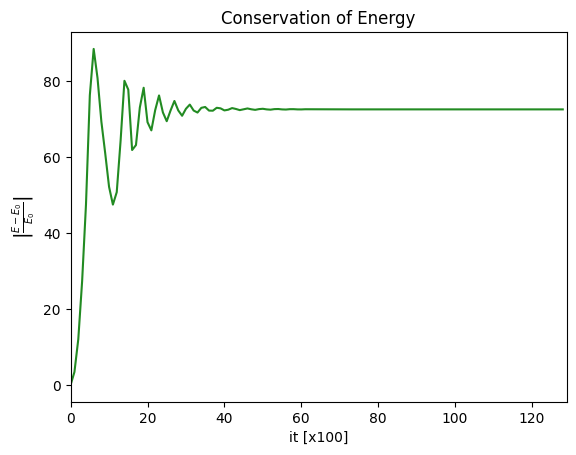

In [14]:
plt.plot(time[:], np.abs((energ[:]-energ[0])/energ[0]), '-', color='forestgreen')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{E-E_0}{E_0}\right|$")
plt.xlim(0, T)
plt.show()